# Folgen und Reihen

In diesem Notebook werden Sie diverse Folgen und Reihen kennenlernen und verschiedene Aufgaben dazu lösen. Hierbei wird es unter anderem um die Newton-Methode gehen, mit der man die Nullstellen einer Funktion numerisch annähern kann oder interessantere Folgen, wie die des Collatz-Problems. Zudem werden Sie sehen, dass man bei der numerischen Berechnung von Grenzwerten vorsichtig sein sollte, und dem Ergebnis nicht direkt trauen sollte, da das Ergebnis mathematisch ungenau ist oder schlichtweg falsch ist. 

<b> Python Grundlagen: </b>  Plots<br>
<b> Math. Grundlagen: </b> Folgen und Reihen <br>

<b>Inhaltsverzeichnis:</b> <br>
<ul>
 <li><a href="#1">Arithmetische Folge</a></li>
 <li><a href="#3">Newton-Verfahren</a></li>
 <li><a href="#4">Geometrische Reihe</a></li>
 <li><a href="#5">Collatz-Problem</a></li>
 <li><a href="#6">Grenzwerte mit Sympy</a></li>
</ul>
</p> 

In [1]:
import matplotlib.pyplot as plt
import squarify
from ipywidgets import interact, IntSlider, Text
from IPython.display import display, Latex
import numpy as np
import math
import sympy as sp

<a id="1"></a>
## Arithmetische Folge

Bei einer arithmetischen Folge ist die Differenz zwischen aufeinanderfolgenden Gliedern konstant ist. Diese Differenz wird als die "gemeinsame Differenz" oder Differenz der arithmetischen Folge bezeichnet.

Die allgemeine Form einer arithmetischen Folge lautet:

$a_n=a_1+(n−1)⋅d \hbox{ für } n \geq 2$

Hierbei ist $a_n$ das $n$-te Glied der Folge, $a_1$ ist das erste Glied, $n$ ist der Index des Glieds (beginnend bei $1$), und $d$ ist die gemeinsame Differenz.

$a_{n+1} - a_n = d \hbox{ für alle n}$

Um die Glieder einer arithmetischen Folge zu berechnen, muss man also das erste Glied $a_1$ kennen und dann die gemeinsame Differenz $d$ verwenden, um die weiteren Glieder der Folge zu erzeugen. 

Beispiel:

Betrachten Sie die arithmetische Folge mit $a_1=3$ und $d=2$. Die ersten fünf Glieder der Folge sind:

$
a_1 = 3 \\
a_2 = 3 + (2-1) \cdot 2 = 5 \\
a_3 = 3 + (3-1) \cdot 2 = 7 \\
a_4 = 3 + (4-1) \cdot 2 = 9 \\
a_5 = 3 + (5-1) \cdot 2 = 11\\
$

In diesem Fall hat die arithmetische Folge eine gemeinsamen Differenz von $2$, und jedes Glied der Folge erhöht sich um $2$ im Vergleich zum vorherigen Glied.

<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 1</b>  </p>
    
**Teilaufgabe 1:**

Implementieren Sie eine Funktion namens `arith_prog`, die einen Wert einer arithmetischen Folge berechnet.


**Parameter:**

- `a1`: Das erste Folgenglied.
- `n`: Der Index des Folgengliedes, das Sie in der arithmetischen Folge berechnen möchten.
- `d`: Die Differenz zwischen aufeinanderfolgenden Folgegliedern in der Folge.

**Teilaufgabe 2:**

Gegeben sei eine arithmetische Folge mit einem Startwert von $ a_1 = 6 $ und einer Differenz von $ d = 7 $. Erstellen Sie eine Liste mit den ersten 15 Folgengliedern.

**Teilaufgabe 3:**

Bestimmen Sie die Parameter für die arithmetische Folge, die durch die Zahlen $ 4,10,16,22,28,\dots $ repräsentiert wird. Berechnen Sie anschließend den Wert für $ n = 100 $ dieser Folge.

**Teilaufgabe 4:**

Bestimmen Sie die Parameter für eine arithmetische Folge, für die gilt: $ x_8 = 44 $ und $ x_{14} = 86 $. Erstellen Sie anschließend eine Liste der ersten 15 Werte dieser Folge.

In [2]:
# Teilaufgabe 1
def arith_prog(a1, n, d):
  
    an = a1 + (n - 1)*d
    
    return an

In [3]:
# Teilaufgabe 2
c = 6
d = 7
indexs = list(range(1, 15))
seq = [arith_prog(c, n, d) for n in indexs]
seq

[6, 13, 20, 27, 34, 41, 48, 55, 62, 69, 76, 83, 90, 97]

In [4]:
# Teilaufgabe 3
d = 6
a1 = 4
n = 100
arith_prog(a1, n, d)

598

In [5]:
# Teilaufgabe 4
c = -5
d = 7

indexs = list(range(1, 15))
seq = [arith_prog(c, n, d) for n in indexs]
seq

[-5, 2, 9, 16, 23, 30, 37, 44, 51, 58, 65, 72, 79, 86]

<a id="3"></a>
## Newton-Verfahren

Das Newton-Verfahren, auch bekannt als Newton-Raphson-Verfahren, ist ein numerisches Verfahren zur Approximation von Nullstellen einer differenzierbaren Funktion. Das Newton-Verfahren verwendet die Ableitung einer Funktion, um iterative Schritte zu berechnen, die immer näher an die gesuchte Nullstelle heranführen. Die Grundidee besteht darin, dass man mit einem Startwert beginnt und dann die Tangente an den Funktionsgraphen an dieser Stelle berechnet. Der Schnittpunkt dieser Tangente mit der x-Achse wird als nächster Näherungswert für die Nullstelle aufgegriffen, woraufhin sich der Prozess wiederholt.

Die Iterationsschritte des Newton-Verfahrens sind durch die folgende Formel gegeben:

$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

Hierbei ist $x_n$ der aktuelle Näherungswert für die Nullstelle, $f(x_n)$ ist der Funktionswert (an dieser Stelle) und $f'(x_n)$ ist die Ableitung der Funktion an dieser Stelle. Dieser Schritt wird wiederholt, bis ein gewünschtes Genauigkeitsniveau erreicht ist.

Das Newton-Verfahren konvergiert gegen eine Nullstelle, wenn der Startwert nahe genug an der gesuchten Lösung liegt. Es wird häufig in der numerischen Analysis und bei der Lösung von Gleichungssystemen eingesetzt.


<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 3</b>  </p> 

In dieser Aufgabe sollen Sie das Newton-Verfahren implementieren.



**Parameter:**

- `f`: Eine Funktion, die einen Wert $ x $ als Eingabe akzeptiert und den Wert von $ f(x) $ zurückgibt. Dies ist die Funktion, deren Nullstellen Sie finden möchten.

- `f_prime`: Eine Funktion, die einen Wert $ x $ als Eingabe akzeptiert und den Wert von $ f'(x) $ zurückgibt. Dies ist die Ableitung von $ f $.

- `n`: Die Anzahl der Iterationen, die das Verfahren durchlaufen soll.

- `initial_guess`: Ein optionaler Parameter, der den Startwert für die Iteration angibt. Wenn kein Wert angegeben wird, soll der Standardwert 10 verwendet werden.

**Anforderungen:**

- Die Methode sollte eine Liste von Werten zurückgeben, die die Näherungslösungen in jeder Iteration darstellen.
- Wenn in irgendeinem Schritt der Ableitungswert $ f'(x) $ gleich Null ist, sollte die Methode einen Fehler mit der Nachricht "Ableitung ist gleich Null. Verfahren kann nicht angewendet werden" auslösen.

**Hinweis:** Das Newton-Verfahren konvergiert nicht immer, und die Konvergenz kann von der anfänglichen Schätzung abhängen.

**Beispiel:** Wenn Sie die Funktion mit $ f(x) = x^2 - 4 $ und $ f'(x) = 2x $ und einem Startwert von 10 und 3 Iterationen aufrufen, sollten Sie eine Liste von Näherungswerten für die Nullstellen von $ f $ erhalten.


In [6]:
def newton_method(f, f_prime,n,initial_guess = 10):
    x = initial_guess
    values = []
    for _ in range(n):
        fx = f(x)
        fpx = f_prime(x)
        if fpx == 0:
            print("Ableitung ist gleich Null. Verfahren kann nicht angewendet werden")
            break
        x = x - fx / fpx
        values.append(x)
    return values

In [13]:
# Diesen Code müssen Sie nicht nachvollziehen können!
# Benutzen Sie ihn um ihre obige implementierte Methode zu testen. 
def plot(n,f):
    fig = plt.figure(figsize=(7.5, 7.5))
    values = []
    y = np.zeros(n)
    x = sp.var('x')
    roots = abs(sp.Poly(f, x).nroots()[0])
    f_d = sp.diff(f,x)
    f_f = sp.lambdify([x],f)
    f_d = sp.lambdify([x],f_d)
    values = newton_method(f_f,f_d,n)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.axvline(x=values[-1], color='r', linestyle='-')
    ma = values[-1]
    latex_text = r'letzter Wert der Approximation: ' + str(ma)
    display(Latex(latex_text))
    display(Latex("exakter Wert: "+ str(roots)))
    x_f = np.arange(-5,10)
    y_f = f_f(x_f)
    plt.plot(x_f,y_f)
    plt.scatter(values,y)
b_slider = IntSlider(min=1, max=11, step=1, value=1)
a = Text(
    value='x**3 - 2*x**2 - 5',
    description='Funktion:',
    disabled=False
)
interact(plot, n=b_slider, f=a)

interactive(children=(IntSlider(value=1, description='n', max=11, min=1), Text(value='x**3 - 2*x**2 - 5', desc…

<function __main__.plot(n, f)>

<a id="4"></a>
## Geometrische Reihe

Die geometrische Reihe ist ausgezeichnet zu visualisieren. Im Folgenden werden Sie solch eine Veranschaulichung kennenlernen.

Stellen Sie sich vor, Sie haben eine geometrische Reihe mit einem Startwert von $a$ und einem konstanten Verhältnis von $r$. Das Folgenglied $a_n$ der geometrischen Reihe folgt der Formel:

$ a_n = a \cdot r^{n-1}$

Dabei ist $n$ ein FOlgenindex der Summanden. Wenn man diese Formel für verschiedene Werte von $n$ anwendet, kann man visuell ein erstes Muster erkennen.
Beispiel: Es sei eine geometrische Reihe mit $a = 1$ und $r = 2$ gegeben. Die ersten Summanden der Reihe wären:

$1, 2, 4, 8, 16$

In diesem Fall sieht man, dass jedes Element der Reihe das vorherige Element mit $2$ multipliziert. Die Reihe wächst exponentiell, da das Verhältnis größer als $1$ ist. Die Veranschaulichung könnte aus Punkten oder Balken bestehen, bei denen die Höhe des nächsten Elements jeweils das Doppelte des vorherigen Elements ist.

Eine geometrische Reihe kann auch konvergieren, wenn der Wachstumsfaktor $r$ zwischen $-1$ und $1$ liegt. In diesem Fall nimmt jedes Reihenglied im Vergleich zum vorherigen Term ab. Ein Beispiel hierfür ist die Reihe mit $a = 1$ und $r = 0, 5$:

$\frac {1}{2} + \left (\frac {1}{2}\right )^2+ \left (\frac {1}{2}\right )^3+ \ldots = \sum \limits _{k=1}^{\infty } \left (\frac {1}{2}\right )^k =1$

In dieser Veranschaulichung würden die Punkte oder Balken mit jedem Term immer kleiner werden und sich schließlich einer bestimmten Grenze annähern.

In [8]:
# Diesen Code müssen Sie nicht verstehen!
def plot(k):
    fig = plt.figure(figsize=(7.5, 7.5))
    ax = fig.gca()
    values = []
    color = ["lightblue"] * (k - 1)
    labels = []
    for j in range(1,k):
        values.append((1/2)**j)
        if j < 9:
            label = r"$\frac{1}{" + str(2 ** j) + r"}$"
            labels.append(label)
        else:
            labels.append("")
    values.append(1-sum(values))
    labels.append("")
    color.append("grey")
    squarify.plot(sizes = values,ec = 'black', label = labels, color=color, ax=ax, text_kwargs={'fontsize':20})
    plt.axis("off")
    
b_slider = IntSlider(min=1, max=15, step=1, value=1)
latex_text = r'$\frac {1}{2} + \left (\frac {1}{2}\right )^2+ \left (\frac {1}{2}\right )^3+ \ldots = \sum \limits _{k=1}^{\infty } \left (\frac {1}{2}\right )^k =1$'
display(Latex(latex_text))
interact(plot, k=b_slider)

<IPython.core.display.Latex object>

interactive(children=(IntSlider(value=1, description='k', max=15, min=1), Output()), _dom_classes=('widget-int…

<function __main__.plot(k)>

<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 4</b>  </p> 
    
In dieser Aufgabe sollen Sie eine Funktion implementieren, die die Summe einer unendlichen Reihe berechnet. Die Reihe wird durch eine gegebene Funktion für die einzelnen Terme repräsentiert. Die Summation soll solange fortgesetzt werden, bis der Unterschied zwischen zwei aufeinanderfolgenden Summen kleiner als eine vorgegebene Toleranz ist.


**Parameter:**

- `term_func`: Dies ist eine Funktion, die einen Parameter akzeptiert und den Wert des n-ten Folgeglied der Reihe zurückgibt. Beispielsweise könnte `term_func(n)` den Wert des n-ten Reihenglieds zurückgeben.

- `start`: Dies ist der Startpunkt, von dem aus die Summation beginnen soll. Dieser Wert gibt den Index des Folgenglied an, der zur Summe hinzugefügt werden soll.

- `tolerance`: Dies ist der Toleranzwert. Die Summation soll fortgesetzt werden, bis der Unterschied zwischen zwei aufeinanderfolgenden Summen kleiner als dieser Toleranzwert ist.

**Anforderungen:**

- Die zu implementierende Funktionsoll solange die Folgenglieder zum Laufindex n aufsummieren, bis die Bedingung der Toleranz erfüllt ist.
- Wenn die Anzahl der Iterationen 100.000.000 übersteigt, soll die Funktion eine Nachricht ausgeben, die darauf hinweist, die Berechnung abbrechen und und die aktuelle Summe zurückgeben.

**Hinweis:** Es gibt Reihen, die sehr langsam konvergieren oder überhaupt nicht konvergieren. In solchen Fällen kann die Funktion lange laufen oder die maximale Anzahl von Iterationen erreichen.

**Beispiel:** Wenn Sie die Funktion mit $ \frac{1}{2^n} $, einem Startwert von 1 und einer Toleranz von 0,001 aufrufen, sollte sie ungefähr den Wert 1 zurückgeben.

In [14]:
def infinite_series_sum(term_func, start, tolerance):

    total_sum = 0
    prev = term_func(start)
    current = term_func(start + 1)
    n = start + 2
    
    while abs(prev - current) > tolerance:
        total_sum += prev
        prev = current
        current = term_func(n)
        n += 1
        if n > 100000000:
            print("Maximale Anzahl an Interationen erreicht.")
            return total_sum
        
    return total_sum

In [15]:
def fun(k):
    return (1/2)**k

In [16]:
infinite_series_sum(fun,1,0.00000000001)

0.9999999999708962

<a id="5"></a>
## Collatz-Problem

Das Collatz-Problem, auch bekannt als das $3n+1$-Problem oder das Ulam-Problem, ist ein mathematisches Phänomen, das sich auf eine einfache Folge konstruieren lässt. 

Das Problem beginnt mit einer beliebigen positiven ganzen Zahl. Wenn die Zahl gerade ist, wird sie durch $2$ geteilt. Wenn sie ungerade ist, wird sie mit $3$ multipliziert und $1$ addiert. Das Ergebnis wird dann als nächste Folgeglied gewählt, der Prozess wird wiederholt. Damit ist die Folge wie folgt definiert:

$$ 
x_{n+1} = \begin{cases} \frac{x_n}{2}, & \text{wenn } x_n \text{ gerade ist}\\ 3x_n + 1, & \text{wenn } x_n \text{ ungerade ist} \end{cases}
$$

Das Ziel besteht darin festzustellen, ob diese Iteration für jede positive ganze Zahl immer in den Zyklus $4, 2, 1$ führt, egal mit welcher Zahl gestartet wird. 

Ein Beispiel: Wenn mit der Zahl $6$ begonnen wird, erhält man die folgende Folge: $6, 3, 10, 5, 16, 8, 4, 2, 1$.

<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 5</b>  </p> 

Ihre Aufgabe ist es, eine Methode zu implementieren, die die Länge der Collatz-Folge für eine gegebene Anzahl von Zahlen berechnet und die Zahl mit der längsten Sequenz identifiziert.

**Implementierung:**

1. Erstellen Sie eine Schleife, um die Collatz-Folge für jede Zahl in einem gegebenen Bereich (z. B. von 1 bis 100.000) zu generieren.
2. Zählen Sie die Anzahl der Schritte, die benötigt werden, um von jeder Zahl zu 1 zu gelangen, und speichern Sie diese in einer Liste.
3. Identifizieren Sie die Zahl mit der längsten Collatz-Sequenz und geben Sie diese zusammen mit ihrer Länge aus.


**Parameter:**

- `max_value`: Die obere Grenze des Bereichs von Zahlen, für die die Collatz-Sequenz generiert werden soll. Zum Beispiel, wenn `max_value` 100.000 ist, sollten Sie die Sequenz für jede Zahl von 1 bis 100.000 generieren.


**Erwartete Ausgabe:** 

"Die längste Sequenz ist für die Zahl X mit einer Länge von Y zu finden."

Ausgabe für `max_value` = 1000 : 

Die längste Sequenz ist für die Zahl 870 mit einer Länge von 178 zu finden.

In [27]:
def analyze_collatz_sequence(max_value):
    checked = 0
    Ylevels= []

    for i in range(1,max_value):
        n = i
        while n != 1:
            if (n % 2) == 0:
                n = n / 2
                checked += 1
            else:
                n = n * 3 + 1
                checked += 1
        Ylevels.append(checked)
        checked = 0

    print("Die längste Sequenz ist zu finden für die Zahl " + str(np.argmax(Ylevels)) + " mit einer Länge von " + str(max(Ylevels)) + ".") 
    
analyze_collatz_sequence(1000)

Die längste Sequenz ist zu finden für die Zahl 870 mit einer Länge von 178.


<a id="6"></a>
## Grenzwerte mit Sympy

SymPy ist eine Python-Bibliothek für symbolische Mathematik. Sie ermöglicht die symbolische Manipulation mathematischer Ausdrücke, einschließlich algebraischer Ausdrücke, Gleichungen, Differentiation, Integration, symbolischer Vereinfachung und vielem mehr.

Mit SymPy können mathematische Ausdrücke in symbolischer Form erstellt und manipuliert werden, anstatt numerische Berechnungen durchzuführen. Es ist besonders nützlich für Berechnungen, bei denen genaue Ergebnisse und symbolische Darstellungen bevorzugt werden, wie z. B. in der Mathematik, Physik, Ingenieurwissenschaften und anderen technischen Bereichen.

Zudem bietet es auch Funktionen zur Berechnung von Grenzwerten. Die Funktion <code>limit_seq()</code> in SymPy kann verwendet werden, um den Grenzwert einer Folge zu bestimmen.

Hier ist ein Beispiel, wie man den Grenzwert einer Folge mit SymPy berechnen kann:

In [28]:
import sympy as sp
from IPython.display import display

# Symbolische Variable definieren
n = sp.Symbol('n')

# Folge definieren
a_n = (5*n**3 + 3*n**2 + 4) / (3*n**3 + 4*n - 5)

# Grenzwert berechnen
limit_value = sp.limit_seq(a_n,n)

display(limit_value)  

5/3

Mit Sympy können auch Summen definiert werden und auf Konvergenz geprüft werden. Dies sieht wie folgt aus:

In [29]:
from sympy import factorial, S, Sum, Symbol, oo

n = Symbol('n', integer=True)

# In Sum ist der erste Parameter der zu summierende Ausdruck. 
# Der zweite Parameter ist ein Tupel bestehen aus (abhängige Variable, start Index, end index)
sum1 = Sum(1/(n**2), (n, 1, oo))
display(sum1)
# gibt zurück ob eine Reihe konvergiert
display(sum1.is_convergent())
# berechnet die Reihe
display(sum1.doit())

sum2 = Sum(n/(2*n + 1), (n, 1, oo))
display(sum2)
display(sum2.is_convergent())
display(sum2.doit())

Sum(n**(-2), (n, 1, oo))

True

pi**2/6

Sum(n/(2*n + 1), (n, 1, oo))

False

oo

<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 6</b>  </p>

In dieser Aufgabe sollen Sie Grenzwerte für bestimmte Folgen und Reihen ermitteln. Verwenden Sie dafür das Python-Modul `Sympy` und validieren Sie die Ergebnisse durch manuelle Überprüfung und durch Plotten.


**Teilaufgabe 1:**  

Bestimmen Sie den Grenzwert für die folgende Folge:

$$
a_n = \frac {n^2(2n+1)(5-3n)}{(1+2n)^4}
$$

**Teilaufgabe 2:** 

Ermitteln Sie den Grenzwert für die folgende Folge:

$$
b_{n} =  (n^2 + n)\log\left(1 + \frac{1}{n^2 + \cos(n)}\right)
$$

Was gibt die Funktion `limit_seq()` aus `Sympy` für diese Folge zurück? Plotten Sie die ersten 150 Glieder der Reihe, um das Ergebnis von `Sympy` zu überprüfen.

**Teilaufgabe 3:** 

Untersuchen Sie die folgende Reihe:

$$
\sum_{n=1}^{\infty} \left(\cos{\left(\frac{1}{n} \right)} - 1\right)
$$

Konvergiert diese Reihe? Welchen Wert gibt `Sympy` für diese Reihe aus? Um diese Reihe zu plotten, sollten Sie die Partialsummen der Reihe verwenden. Implementieren Sie dazu die Funktion `calculate_first_n_terms`, die die ersten n Partialsummen als Liste zurückgibt:

```python
def calculate_first_n_terms(term_func, start, n):
    ...
```

**Parameter:** 
 
- `term_func`: Eine Funktion, die ein Folgenglied der Reihe berechnet.
- `start`: Der Startindex der Reihe.
- `n`: Der Endindex der Reihe.

Nutzen Sie diese Funktion, um die ersten 150 Partialsummen der Reihe zu plotten.

**Hinweis:**

Lassen Sie nicht einfach nur die Grenzwerte durch Sympy berechnen, sondern hinterfragen Sie auch, ob die Ergebnisse tatsächlich richtig sein können.

In [30]:
# Teilaufgabe 1
n = sp.Symbol('n')

a_n = (n**2*(2*n+1)*(5-3*n))/(1+2*n)**4

limit_value = sp.limit_seq(a_n,n)

display(limit_value)  

-3/8

In [31]:
# Teilaufgabe 2

In [33]:
(n**2 + n)*sp.log(1 + 1/(n**2 + sp.cos(n)))

(n**2 + n)*log(1 + 1/(n**2 + cos(n)))

In [35]:
print(sp.limit_seq((n**2 + n)*sp.log(1 + 1/(n**2 + sp.cos(n))),n))

None


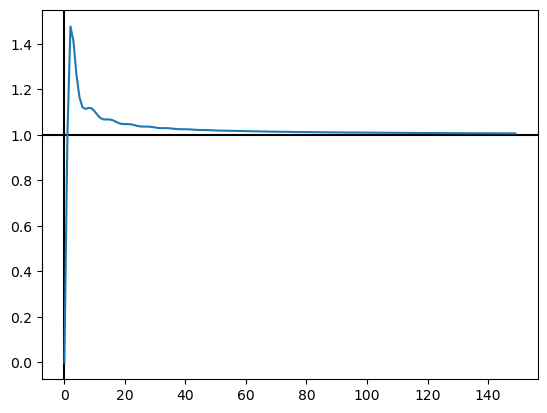

In [36]:
fig, ax = plt.subplots()
x = np.arange(0,150)
y = (x**2 + x)*np.log(1 + 1/(x**2 + np.cos(x)))
ax.axhline(y=1, color='k')
ax.axvline(x=0, color='k')
plt.plot(x,y)

In [37]:
# Teilaufgabe 3

In [38]:
n = Symbol('n')
expr = sp.cos(1/n) - 1
sum3 = Sum(expr, (n, 1, oo))

In [39]:
sum3

Sum(cos(1/n) - 1, (n, 1, oo))

In [40]:
display(sum3.is_convergent())
display(sum3.doit())

False

Sum(cos(1/n) - 1, (n, 1, oo))

In [41]:
def calculate_first_n_terms(term_func, start, n):

    total_sum = 0
    elements = []
    
    for i in range(start,n + 1):
        value = term_func(i)
        total_sum += value
        elements.append(total_sum)
        
    return elements

Der Grenzwert befindet sich ungefähr bei -0.775436336713651


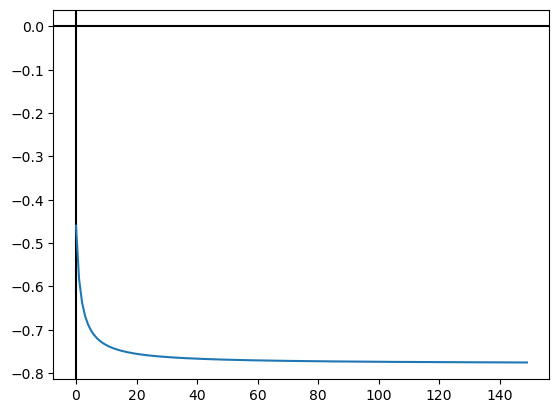

In [44]:
def fun(k):
    return sp.cos(1/k) - 1 

fig, ax = plt.subplots()
x = np.arange(0,150)
y = calculate_first_n_terms(fun,1,150)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
print(r"Der Grenzwert befindet sich ungefähr bei " + str(y[-1]))
plt.plot(x,y)